In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set(style="whitegrid")

# The dataset includes features like Patient ID, Age, Sex, Blood Pressure, Heart Rate, Cholesterol Levels, Diabetes Presence, Family History, Smoking Habits, and Obesity that are connected to the health of the patients. Along with lifestyle characteristics, it also covers sleep hours per day, days per week of physical activity, and hours spent being sedentary each day. The dataset also includes geographic information like country, continent, and hemisphere, as well as socioeconomic characteristics like income. The variable of interest is "Heart Attack Risk," indicating a potential emphasis on evaluating the risk of heart attacks through a range of lifestyle and health-related factors.

In [274]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [275]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']


In [276]:
df.shape

(8763, 26)

# Pre-processing 

In [277]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic', 'Diastolic']] = df[['Systolic', 'Diastolic']].apply(pd.to_numeric)
df = df.drop('Blood Pressure', axis=1)
df['Mean Blood Pressure'] = (df['Systolic'] + df['Diastolic']) / 2
df = df.drop(['Systolic', 'Diastolic'], axis=1)
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Mean Blood Pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,123.0
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,129.0
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,136.5
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,131.5
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,89.5


In [278]:
df.shape

(8763, 26)

In [279]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [280]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk', 'Mean Blood Pressure']


In [281]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Mean Blood Pressure                0
dtype: int64


In [282]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [283]:
columns = ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk', 'Mean Blood Pressure']
dtypes = df.dtypes
sorted_columns = dtypes.sort_values().index
df_sorted = df[sorted_columns]
df_sorted.head()

,Previous Heart Problems,Stress Level,Medication Use,Heart Attack Risk,Triglycerides,Physical Activity Days Per Week,Alcohol Consumption,Obesity,Family History,Diabetes,Heart Rate,Cholesterol,Sleep Hours Per Day,Age,Smoking,Income,BMI,Mean Blood Pressure,Exercise Hours Per Week,Sedentary Hours Per Day,Diet,Sex,Country,Continent,Hemisphere,Patient ID
0,0,9,0,0,286,0,0,0,0,0,72,208,6,67,1,261404,31.251233,123.0,4.168189,6.615001,Average,Male,Argentina,South America,Southern Hemisphere,BMW7812
1,1,1,0,0,235,1,1,1,1,1,98,389,7,21,1,285768,27.194973,129.0,1.813242,4.963459,Unhealthy,Male,Canada,North America,Northern Hemisphere,CZE1114
2,1,9,1,0,587,4,0,0,0,1,72,324,4,21,0,235282,28.176571,136.5,2.078353,9.463426,Healthy,Female,France,Europe,Northern Hemisphere,BNI9906
3,1,9,0,0,378,3,1,0,1,1,73,383,4,84,1,125640,36.464704,131.5,9.828130,7.648981,Average,Male,Canada,North America,Northern Hemisphere,JLN3497
4,1,6,0,0,231,1,0,1,1,1,93,318,5,66,1,160555,21.809144,89.5,5.804299,1.514821,Unhealthy,Male,Thailand,Asia,Northern Hemisphere,GFO8847


# Analysis

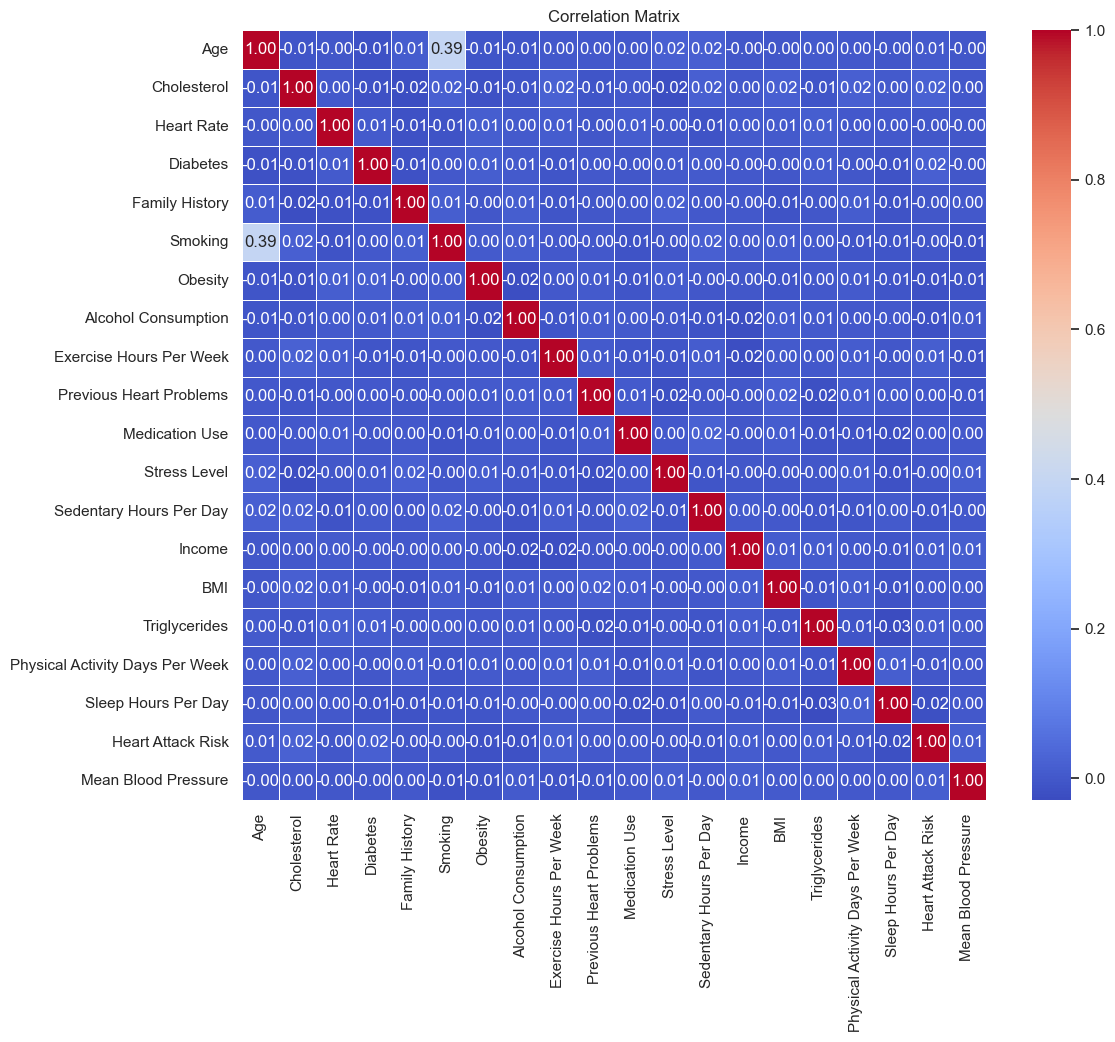

In [284]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [285]:
above_40 = df[df['Age'] > 40]
smokers = df[df['Smoking'] == 1]
high_BP=df[df['Mean Blood Pressure']>115]

In [286]:
above_40.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Mean Blood Pressure
count,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.0,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000
mean,65.543416,259.140786,75.070309,0.648794,0.495363,1.0,0.502445,0.594841,10.027473,0.497049,0.497892,5.496038,6.033930,158509.760074,28.913051,417.103187,3.496206,7.010116,0.357444,110.150143
std,14.595950,80.692916,20.513705,0.477387,0.500021,0.0,0.500036,0.490964,5.804626,0.500033,0.500038,2.863937,3.442478,80583.380937,6.303790,224.388335,2.269181,2.001997,0.479287,15.286690
min,41.000000,120.000000,40.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.004443,0.000000,0.000000,1.000000,0.015174,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,75.000000
25%,53.000000,191.000000,57.000000,0.000000,0.000000,1.0,0.000000,0.000000,4.958235,0.000000,0.000000,3.000000,3.104116,88440.500000,23.451866,222.000000,2.000000,5.000000,0.000000,98.500000
50%,66.000000,258.000000,75.000000,1.000000,0.000000,1.0,1.000000,1.000000,10.122971,0.000000,0.000000,5.000000,5.996141,158317.000000,28.826755,421.000000,3.000000,7.000000,0.000000,110.500000
75%,78.000000,328.000000,93.000000,1.000000,1.000000,1.0,1.000000,1.000000,15.117562,1.000000,1.000000,8.000000,8.979253,228931.500000,34.270152,611.000000,5.000000,9.000000,1.000000,122.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.0,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,145.000000


In [287]:
print(smokers.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  7859.000000  7859.000000  7859.000000  7859.000000     7859.000000   
mean     56.553760   260.325359    74.935742     0.652373        0.494974   
std      20.492976    80.858713    20.507206     0.476247        0.500007   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      41.000000   192.000000    57.000000     0.000000        0.000000   
50%      58.000000   260.000000    75.000000     1.000000        0.000000   
75%      74.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

       Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count   7859.0  7859.000000          7859.000000              7859.000000   
mean       1.0     0.502100             0.600204                10.013990   
std        0.0     0.500027             0.489888                 5.794482  

In [288]:
high_BP.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Mean Blood Pressure
count,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000
mean,53.983473,259.175703,74.944332,0.651493,0.492027,0.889823,0.499565,0.596985,9.990221,0.488257,0.499565,5.512902,5.996573,159526.594085,28.890261,420.166425,3.467962,7.002609,0.364743,125.507393
std,21.177805,80.767698,20.628743,0.476567,0.500009,0.313155,0.500072,0.490575,5.742357,0.499935,0.500072,2.841811,3.445479,80875.367326,6.296736,224.350372,2.285757,1.980398,0.481428,7.122327
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005109,0.000000,0.000000,1.000000,0.008307,20328.000000,18.020155,30.000000,0.000000,4.000000,0.000000,115.500000
25%,36.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.995509,0.000000,0.000000,3.000000,3.032949,89664.000000,23.510371,228.000000,1.000000,5.000000,0.000000,119.500000
50%,54.000000,258.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.078155,0.000000,0.000000,6.000000,5.834959,159657.000000,28.718921,423.000000,3.000000,7.000000,0.000000,124.500000
75%,72.000000,328.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.946303,1.000000,1.000000,8.000000,8.983323,230032.000000,34.311546,617.000000,5.000000,9.000000,1.000000,130.500000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299909.000000,39.993581,800.000000,7.000000,10.000000,1.000000,145.000000


In [289]:
numerical_columns = ['Age', 'Exercise Hours Per Week', 'BMI', 'Triglycerides', 'Mean Blood Pressure','Physical Activity Days Per Week', 'Sleep Hours Per Day']

In [290]:
descriptive_stats = df[numerical_columns].describe()
mode_values = df[numerical_columns].mode().iloc[0]
range_values = df[numerical_columns].max() - df[numerical_columns].min()
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['range'] = range_values
print(descriptive_stats)

               Age  Exercise Hours Per Week          BMI  Triglycerides  \
count  8763.000000              8763.000000  8763.000000    8763.000000   
mean     53.707977                10.014284    28.891446     417.677051   
std      21.249509                 5.783745     6.319181     223.748137   
min      18.000000                 0.002442    18.002337      30.000000   
25%      35.000000                 4.981579    23.422985     225.500000   
50%      54.000000                10.069559    28.768999     417.000000   
75%      72.000000                15.050018    34.324594     612.000000   
max      90.000000                19.998709    39.997211     800.000000   
mode     90.000000                 0.002442    18.002337     799.000000   
range    72.000000                19.996267    21.994874     770.000000   

       Mean Blood Pressure  Physical Activity Days Per Week  \
count          8763.000000                      8763.000000   
mean            110.115885                      

In [291]:
grouped_data_continent = df.groupby('Continent') 
agg_result_continent = grouped_data_continent.agg({
    'Age': ['mean', 'max', 'min'],  
    'BMI': ['mean', 'max', 'min'],  
})

agg_result_continent

Age                BMI                      
                    mean max min       mean        max        min
Continent                                                        
Africa         54.781214  90  18  29.044729  39.997211  18.059471
Asia           53.748329  90  18  28.821644  39.976061  18.016191
Australia      53.445701  90  18  28.926090  39.993581  18.009025
Europe         53.261937  90  18  28.866315  39.984343  18.002337
North America  54.509302  90  18  29.107448  39.970515  18.004211
South America  53.342878  90  18  28.805998  39.989915  18.013606

In [292]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
grouped_data_exercise = df.groupby('Age')  
agg_result_exercise = grouped_data_exercise.agg({  
    'BMI': 'mean',  
    'Exercise Hours Per Week':'max'
}).reset_index()
agg_result_exercise


,Age,BMI,Exercise Hours Per Week
0,18,29.752769,19.894293
1,19,29.564604,19.865055
2,20,29.045491,19.807181
3,21,28.517219,19.679456
4,22,28.924276,19.873920
5,23,28.960922,19.973060
6,24,28.936130,19.930273
7,25,29.008191,19.977482
8,26,28.544994,19.990822
9,27,29.106652,19.293130


In [293]:
grouped_data = df.groupby('Sex').mean()
grouped_data

C:\Users\thush\AppData\Local\Temp\ipykernel_8668\646038391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Sex').mean()


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Mean Blood Pressure
Sex,,,,,,,,,,,,,,,,,,,,
Female,53.060709,258.942685,75.362368,0.649698,0.491327,0.659125,0.499623,0.596531,10.075528,0.494344,0.503771,5.564480,5.977934,157937.871041,28.920420,416.680995,3.516214,7.039593,0.355958,110.261689
Male,53.988873,260.282769,74.873834,0.653412,0.493700,1.000000,0.502209,0.598756,9.987705,0.496482,0.495991,5.428571,6.000528,158404.357552,28.878872,418.109311,3.478154,7.016528,0.359188,110.052610


# Visualisation


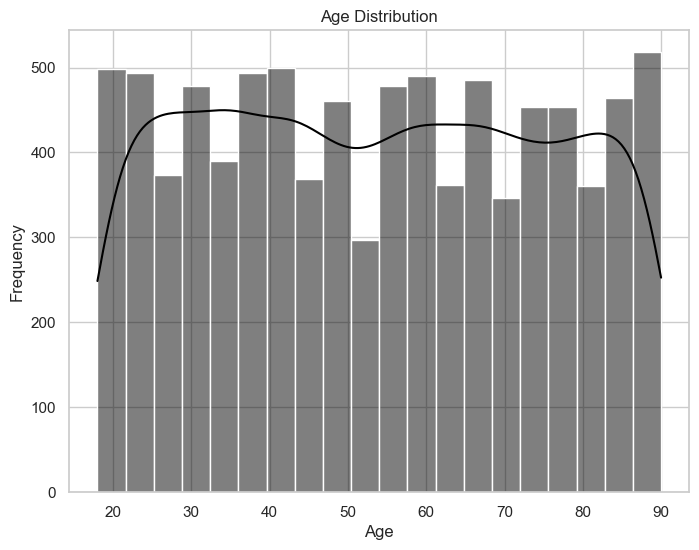

In [294]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

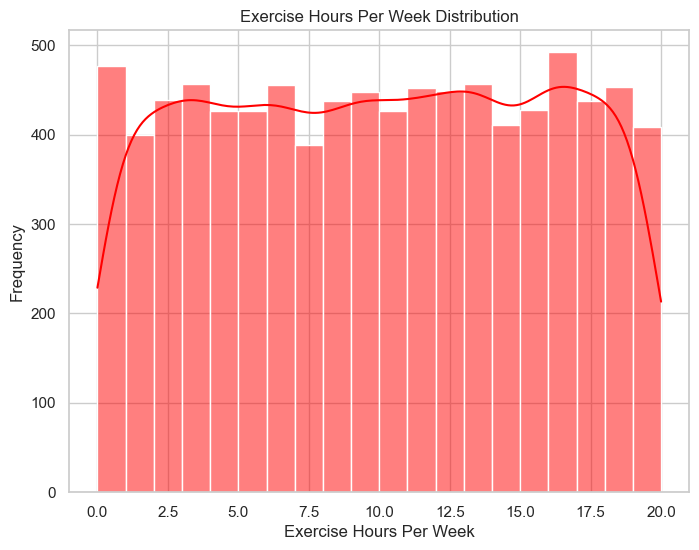

In [295]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Exercise Hours Per Week'], bins=20, kde=True, color='#FF0000')
plt.title('Exercise Hours Per Week Distribution')
plt.xlabel('Exercise Hours Per Week')
plt.ylabel('Frequency')
plt.show()

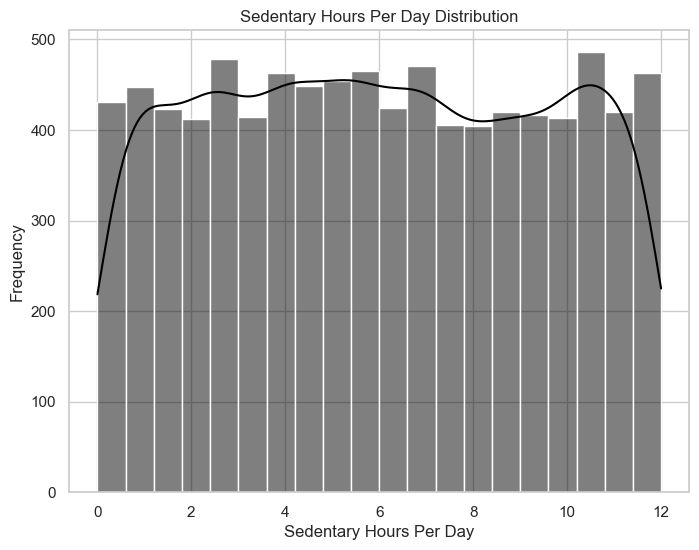

In [296]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sedentary Hours Per Day'], bins=20, kde=True, color='black')
plt.title('Sedentary Hours Per Day Distribution')
plt.xlabel('Sedentary Hours Per Day')
plt.ylabel('Frequency')
plt.show()

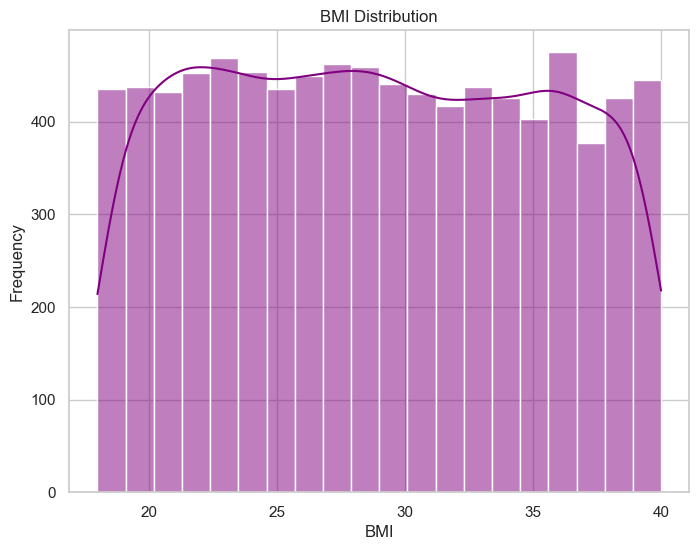

In [297]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='purple')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

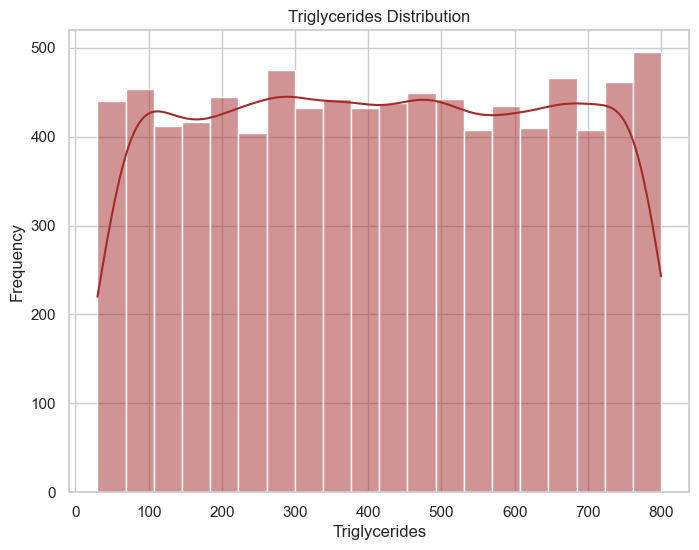

In [298]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Triglycerides'], bins=20, kde=True, color='brown')
plt.title('Triglycerides Distribution')
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.show()

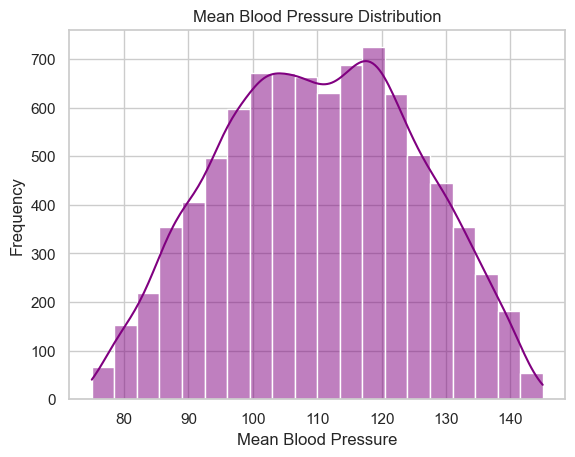

In [299]:
sns.histplot(df['Mean Blood Pressure'], bins=20, kde=True, color='purple')
plt.title('Mean Blood Pressure Distribution')
plt.xlabel('Mean Blood Pressure')
plt.ylabel('Frequency')

plt.show()


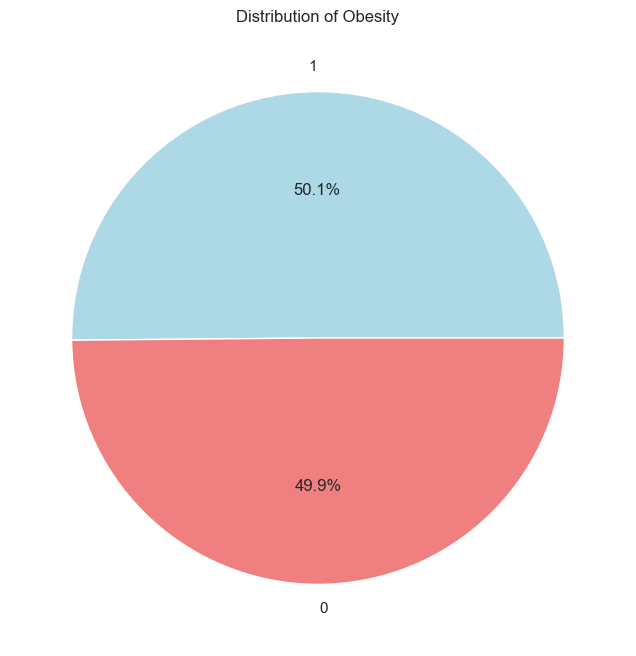

In [300]:
obesity_counts = df['Obesity'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Obesity')
plt.show()

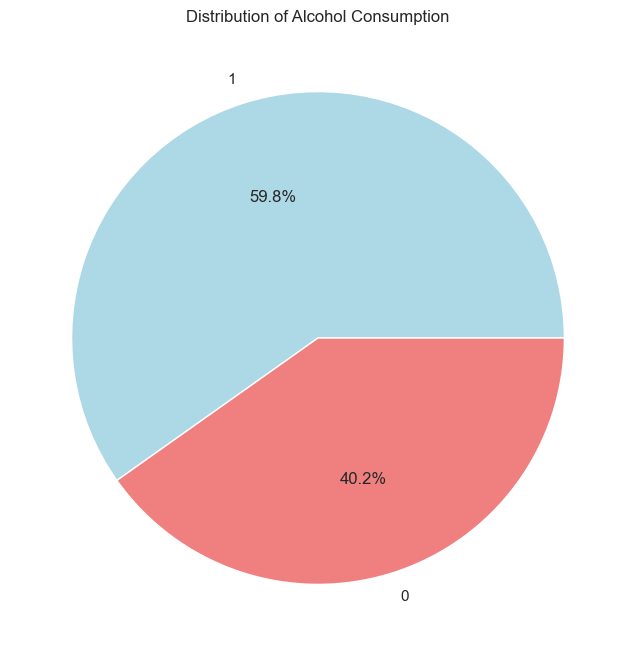

In [301]:
alcohol_counts = df['Alcohol Consumption'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Alcohol Consumption')
plt.show()

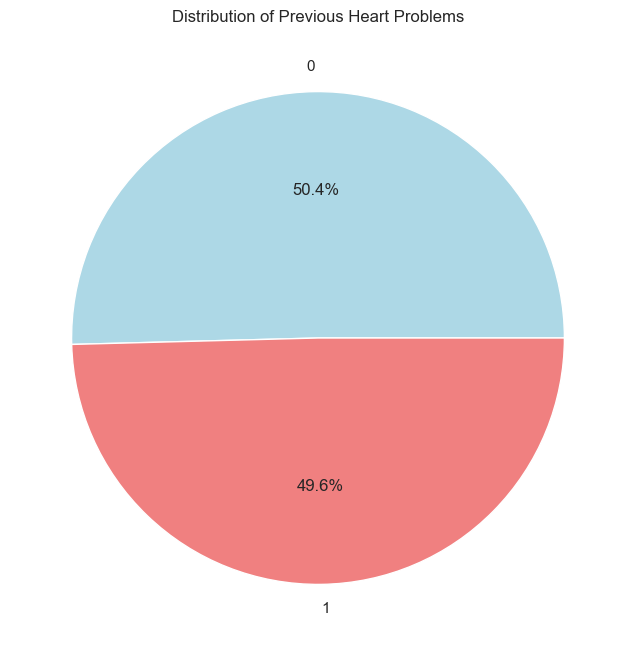

In [302]:
heart_problems_counts = df['Previous Heart Problems'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(heart_problems_counts, labels=heart_problems_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Previous Heart Problems')
plt.show()

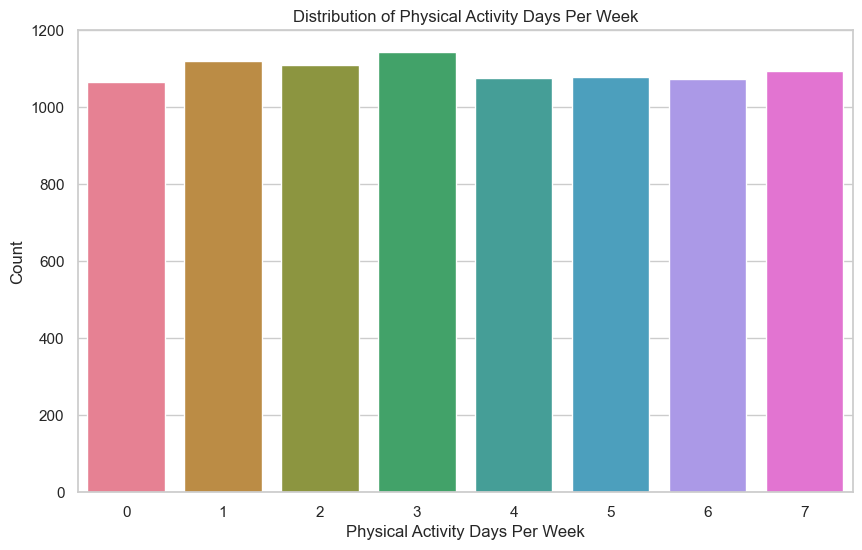

In [303]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Activity Days Per Week', data=df, palette='husl')
plt.title('Distribution of Physical Activity Days Per Week')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Count')
plt.show()

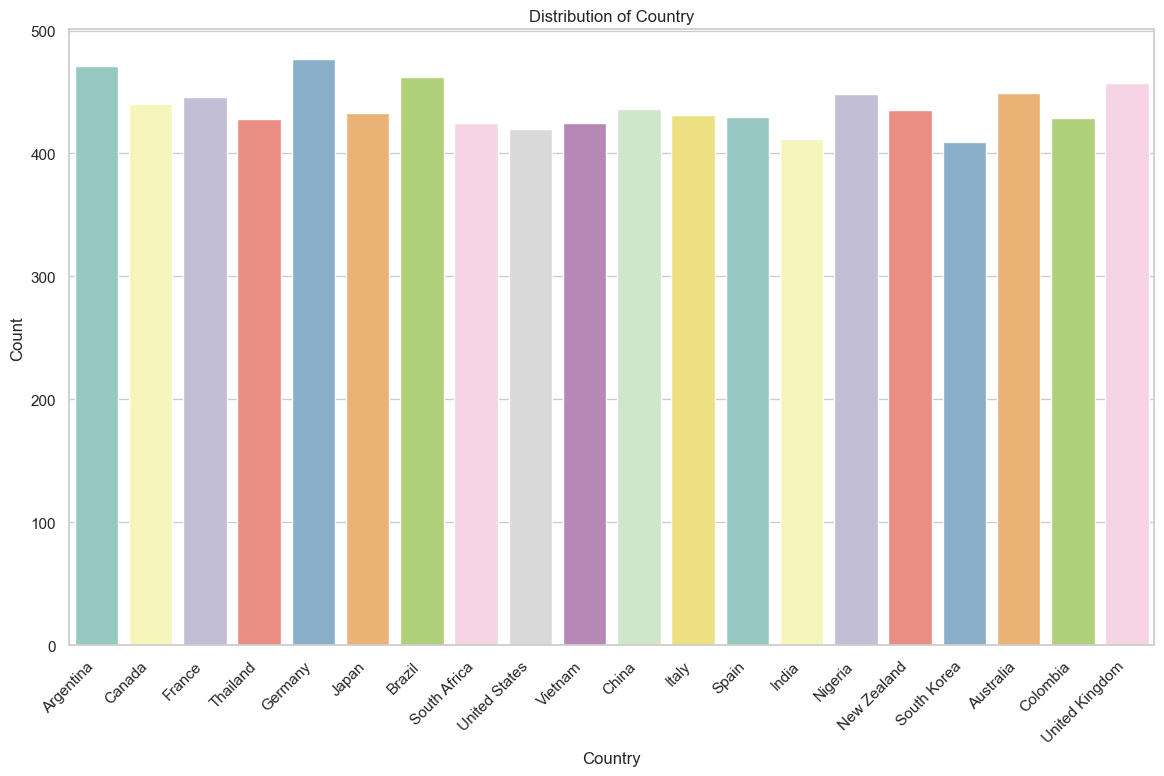

In [304]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Country', data=df, palette='Set3')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

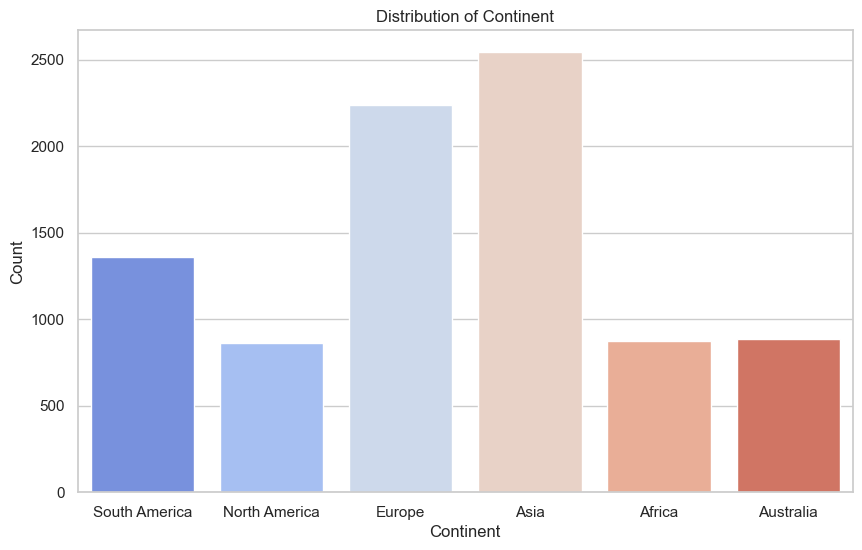

In [305]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df, palette='coolwarm')
plt.title('Distribution of Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

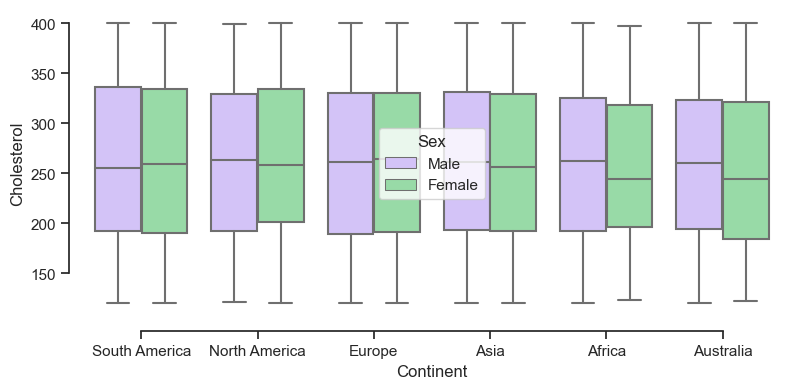

In [306]:
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Cholesterol', hue="Sex",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

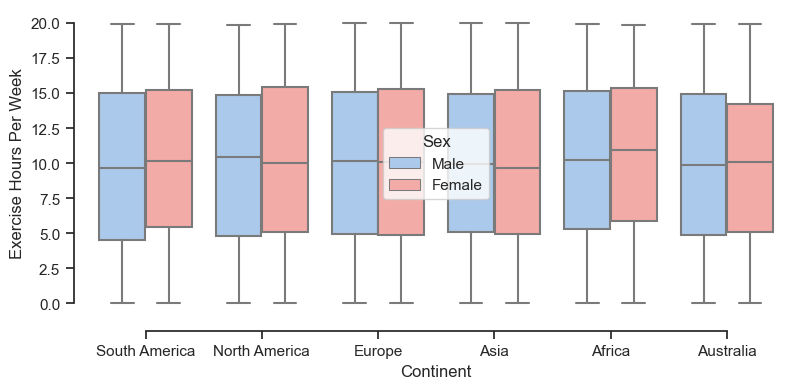

In [307]:
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Exercise Hours Per Week',  hue="Sex",
             palette=["b", "r"],
            data=df)
sns.despine(offset=10, trim=True)

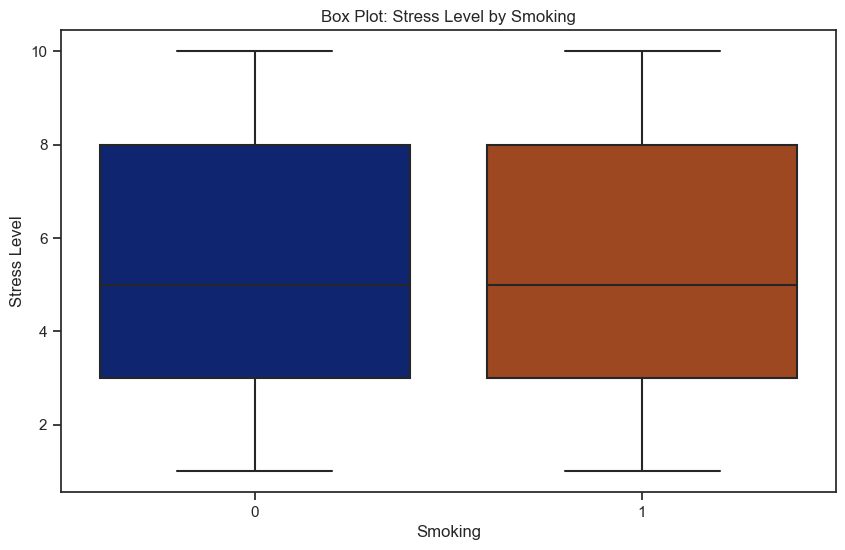

In [308]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking', y='Stress Level', data=df, palette='dark')
plt.title('Box Plot: Stress Level by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Stress Level')
plt.show()

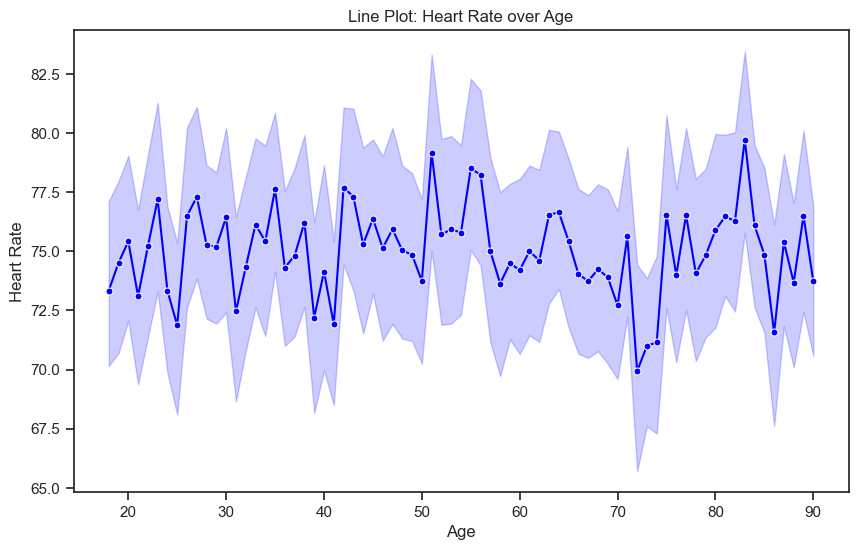

In [309]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Heart Rate', data=df, marker='o', markersize=5, color='blue')
plt.title('Line Plot: Heart Rate over Age')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

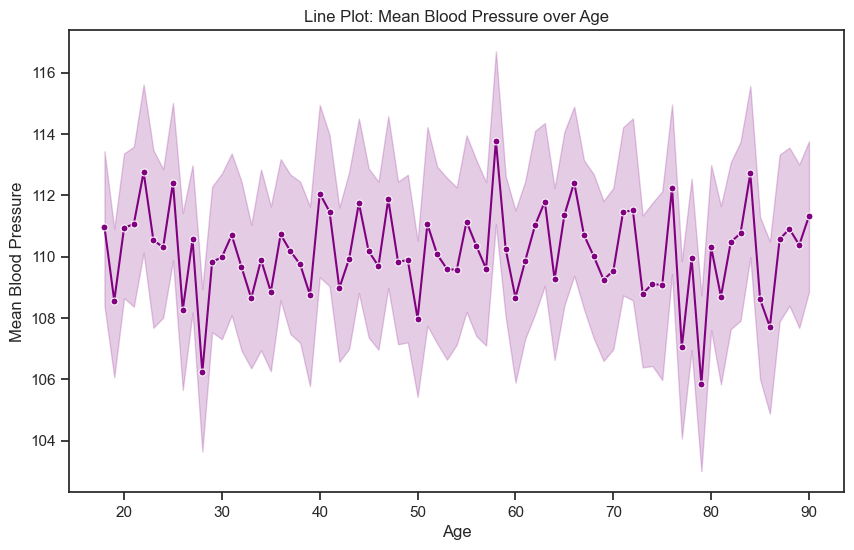

In [310]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Mean Blood Pressure', data=df, marker='o', markersize=5, color='purple')
plt.title('Line Plot: Mean Blood Pressure over Age')
plt.xlabel('Age')
plt.ylabel('Mean Blood Pressure')
plt.show()

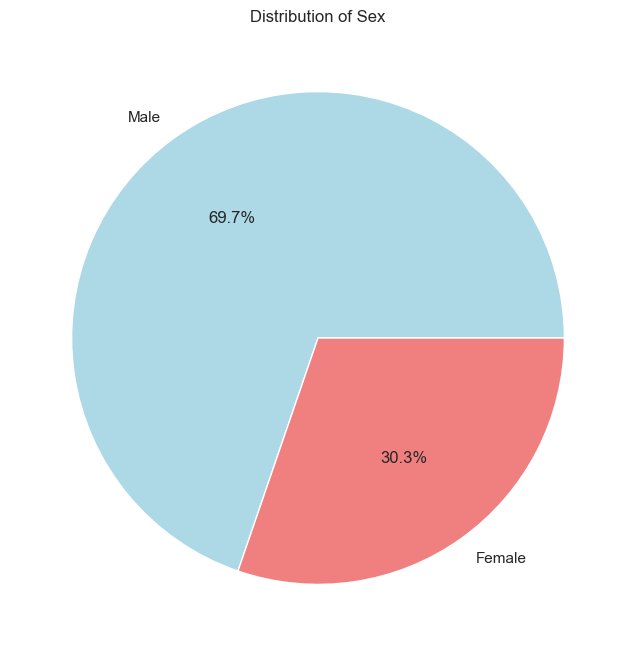

In [311]:
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.show()

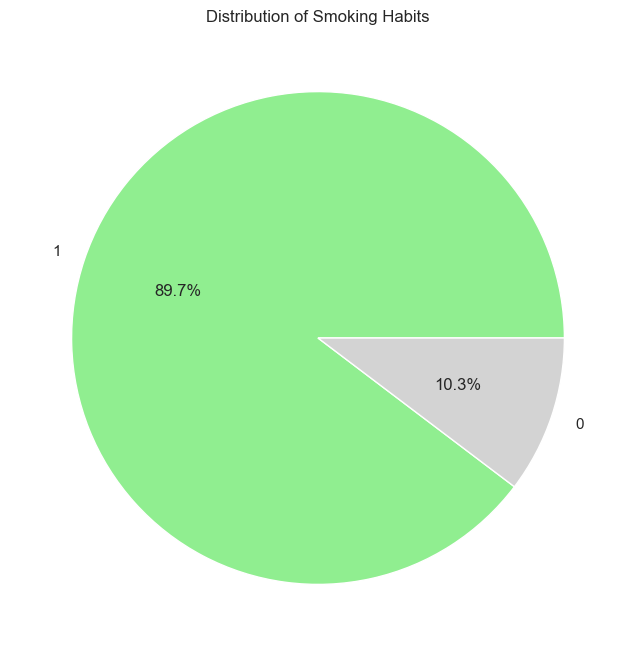

In [312]:
smoking_counts = df['Smoking'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightgray'])
plt.title('Distribution of Smoking Habits')
plt.show()

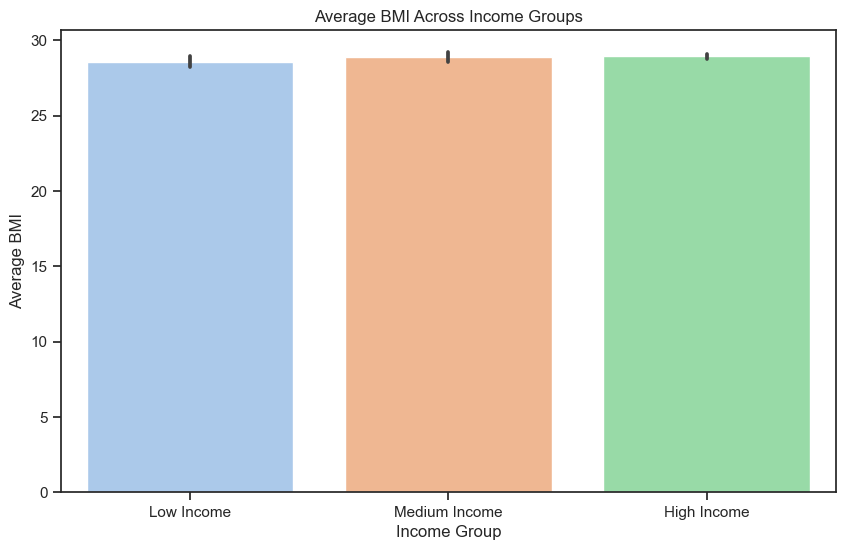

In [313]:
df['Income Group'] = pd.cut(df['Income'], bins=[0, 50000, 100000, float('inf')],
                            labels=['Low Income', 'Medium Income', 'High Income'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Group', y='BMI', data=df)
plt.title('Average BMI Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Average BMI')
plt.show()

In [321]:
label_encoder = LabelEncoder()
categorical_columns = ["Sex", "Diet", "Country", "Continent", "Hemisphere", "Income Group"]
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Mean Blood Pressure,Income Group
0,BMW7812,67,1,208,72,0,0,1,0,0,4.168189,0,0,0,9,6.615001,261404,31.251233,286,0,6,0,5,1,0,123.0,0
1,CZE1114,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,285768,27.194973,235,1,7,3,4,0,0,129.0,0
2,BNI9906,21,0,324,72,1,0,0,0,0,2.078353,1,1,1,9,9.463426,235282,28.176571,587,4,4,6,3,0,0,136.5,0
3,JLN3497,84,1,383,73,1,1,1,0,1,9.828130,0,1,0,9,7.648981,125640,36.464704,378,3,4,3,4,0,0,131.5,0
4,GFO8847,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,160555,21.809144,231,1,5,16,1,0,0,89.5,0


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   int64  
 12  Previous Heart Probl

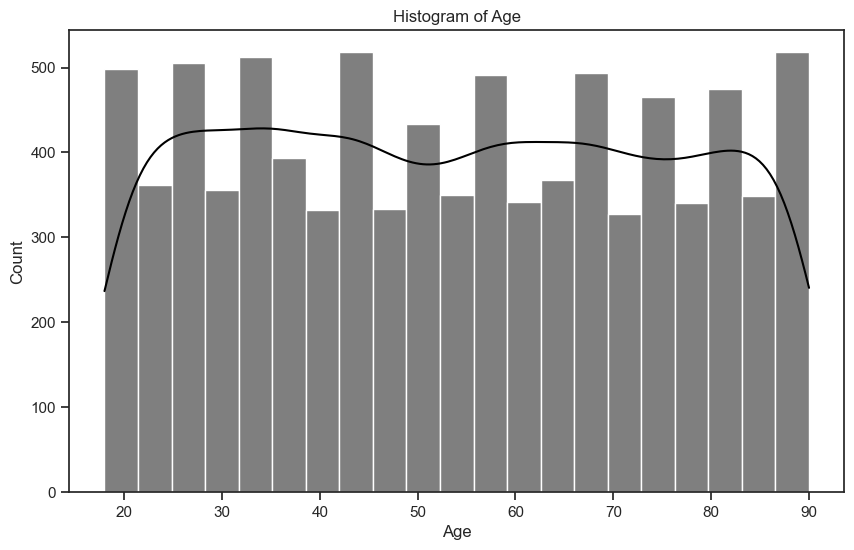

Age: Skewness = 0.03, Kurtosis = -1.21



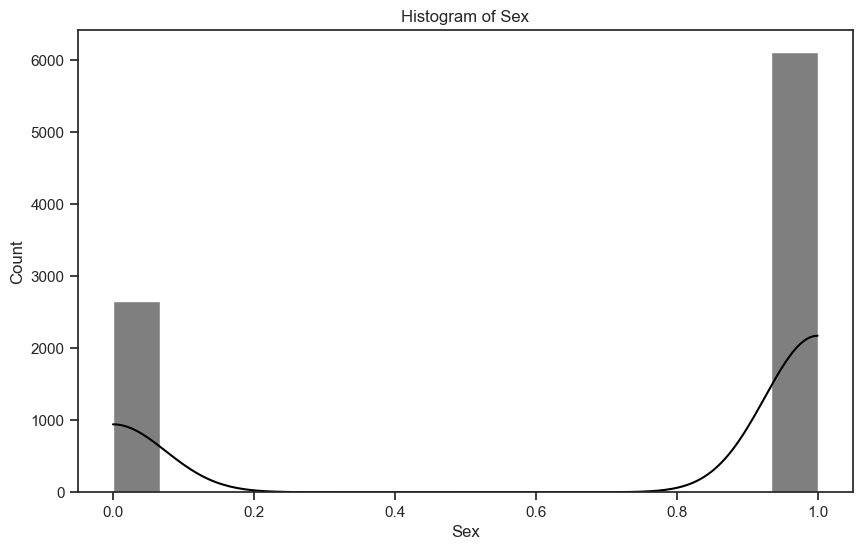

Sex: Skewness = -0.86, Kurtosis = -1.26



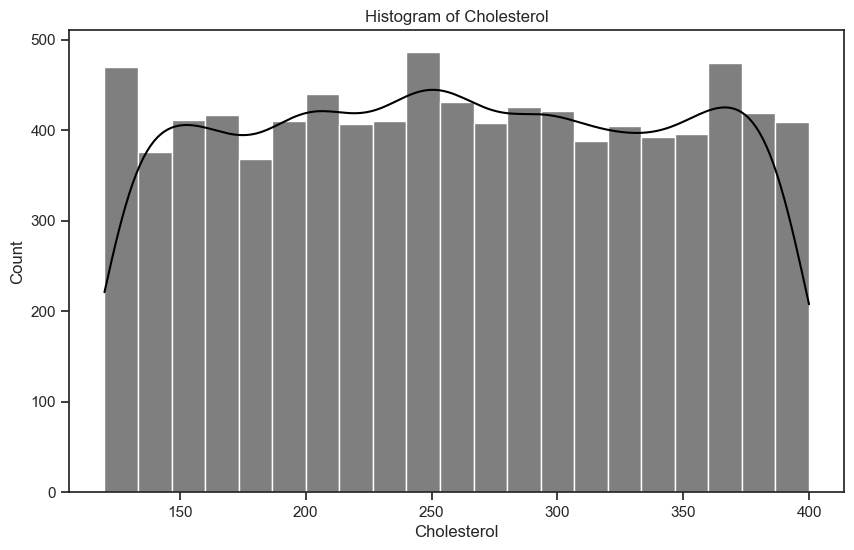

Cholesterol: Skewness = -0.00, Kurtosis = -1.18



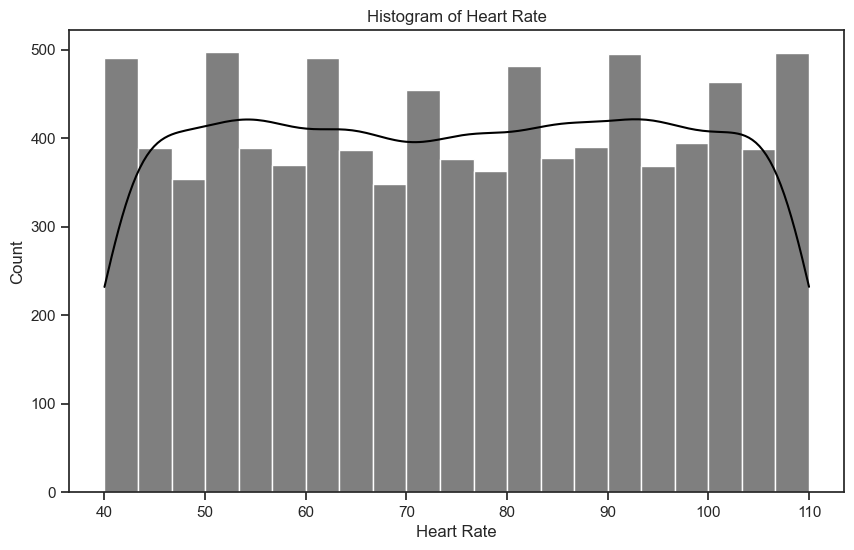

Heart Rate: Skewness = -0.00, Kurtosis = -1.21



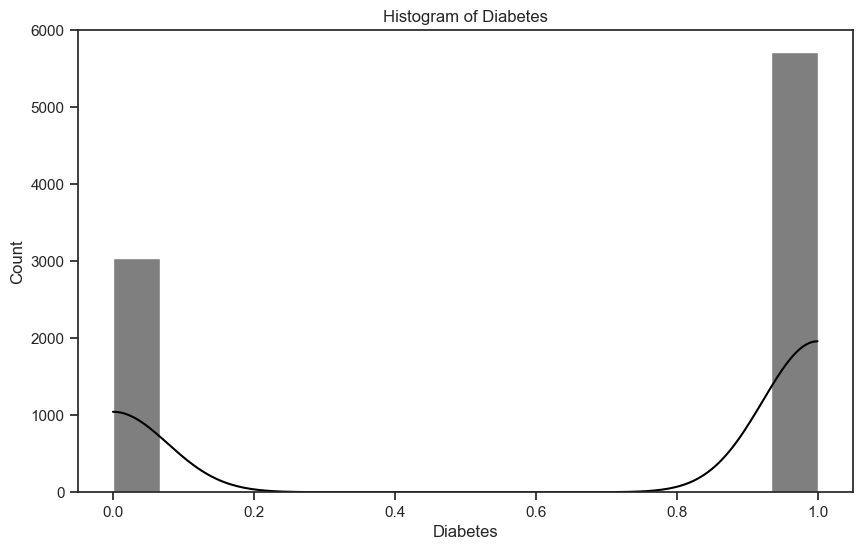

Diabetes: Skewness = -0.64, Kurtosis = -1.59



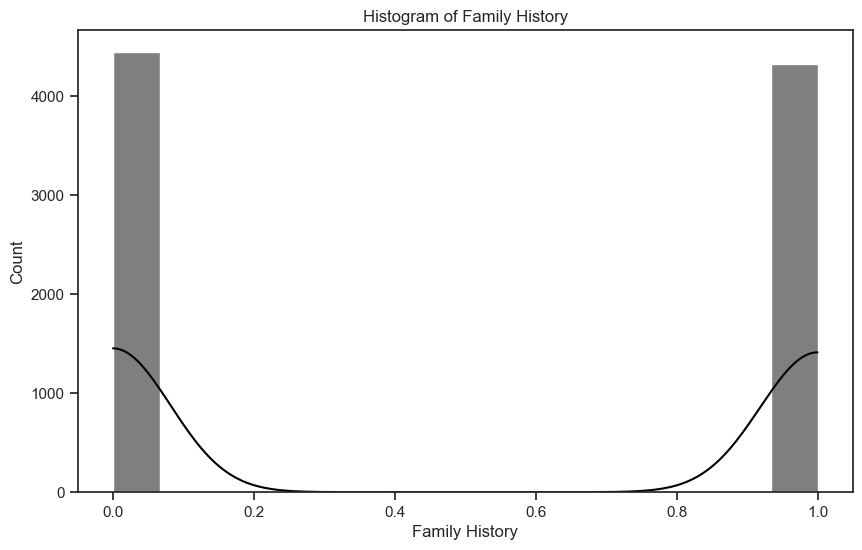

Family History: Skewness = 0.03, Kurtosis = -2.00



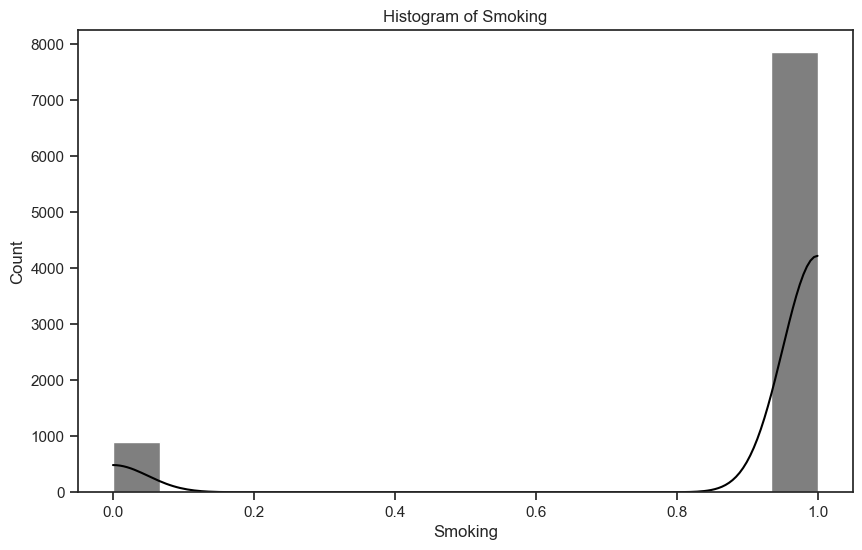

Smoking: Skewness = -2.61, Kurtosis = 4.81



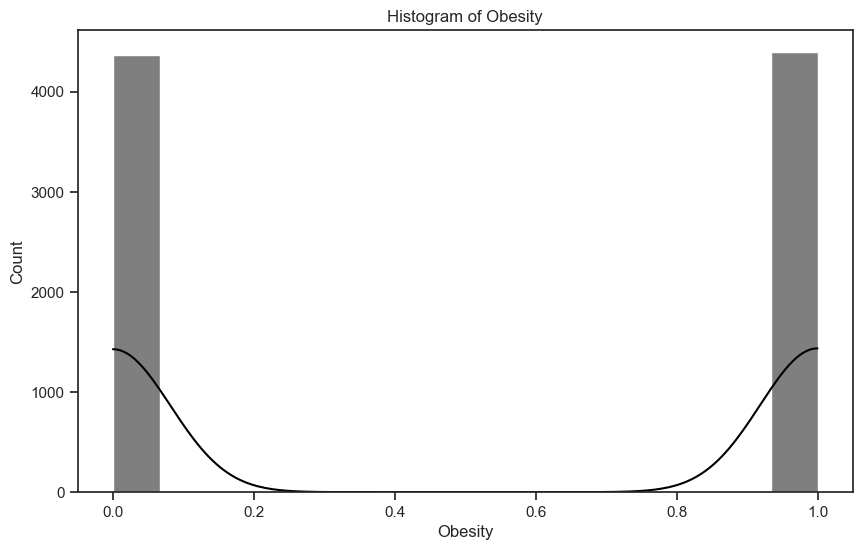

Obesity: Skewness = -0.01, Kurtosis = -2.00



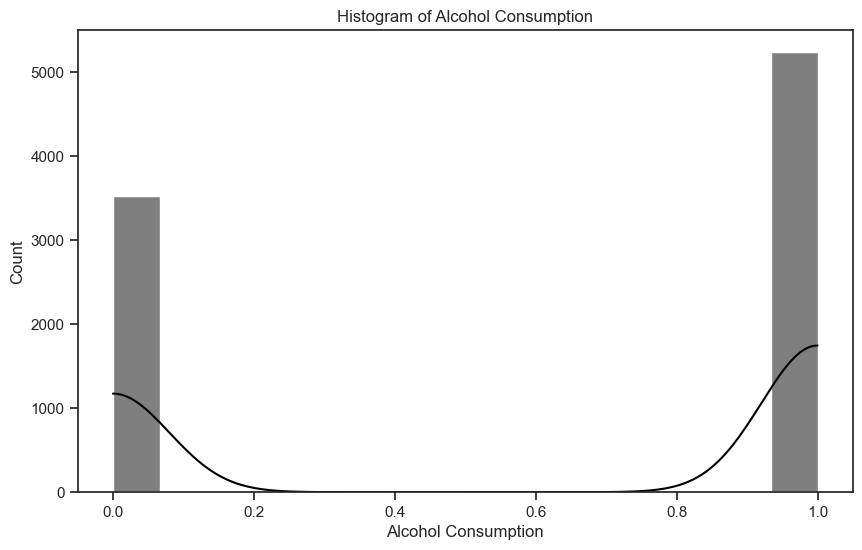

Alcohol Consumption: Skewness = -0.40, Kurtosis = -1.84



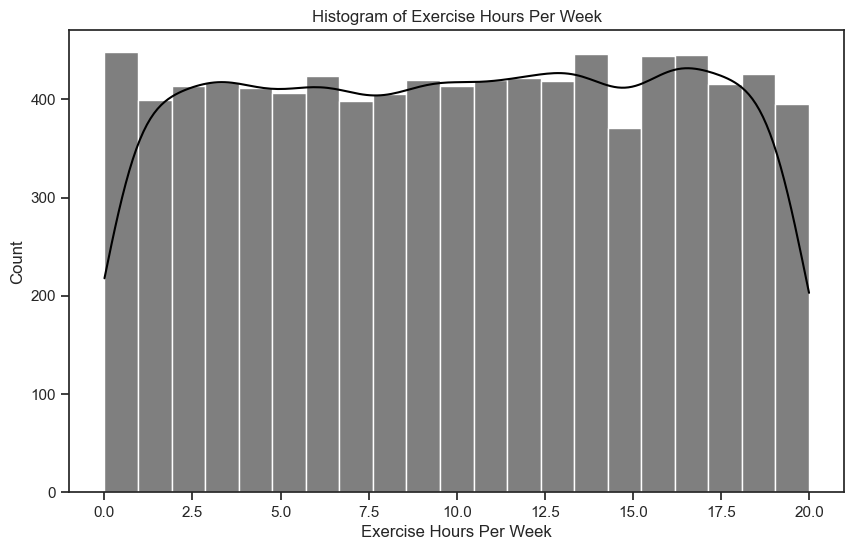

Exercise Hours Per Week: Skewness = -0.02, Kurtosis = -1.20



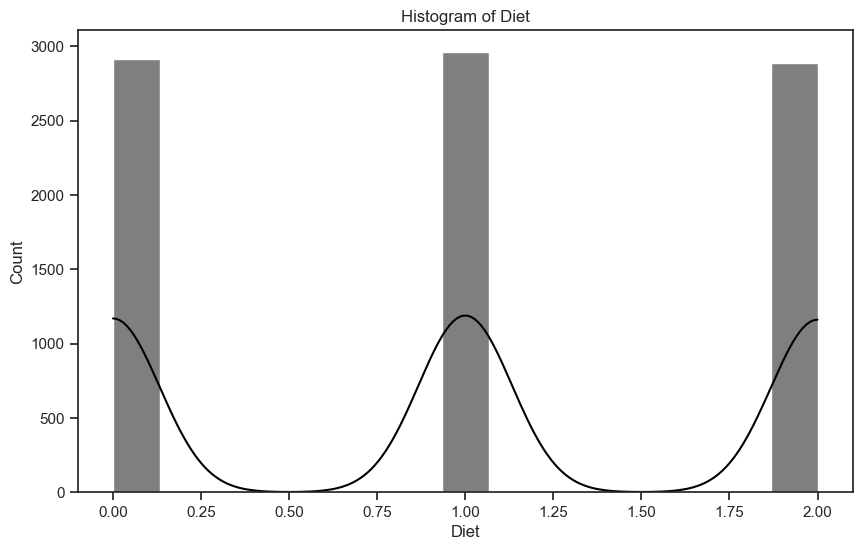

Diet: Skewness = 0.00, Kurtosis = -1.49



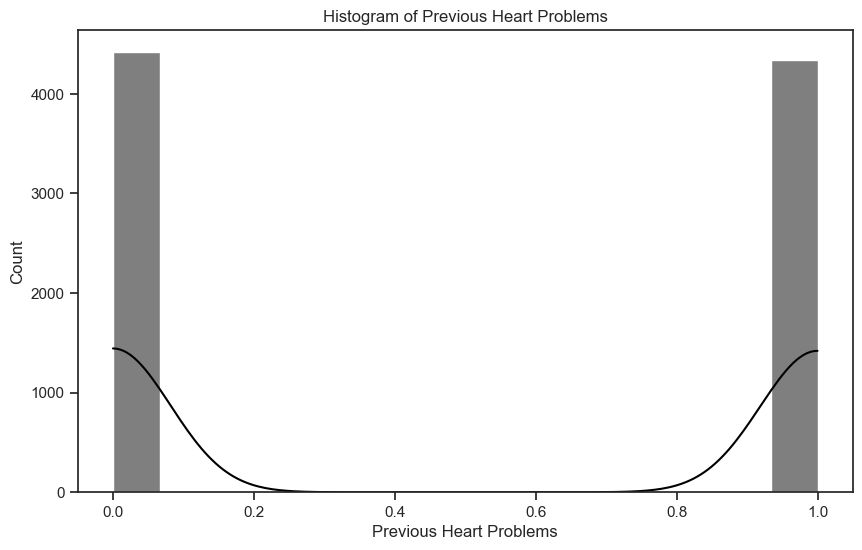

Previous Heart Problems: Skewness = 0.02, Kurtosis = -2.00



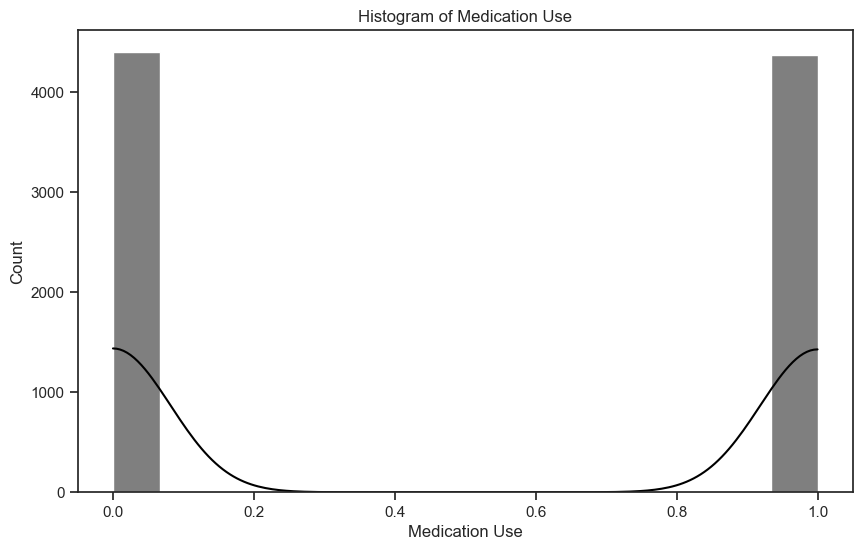

Medication Use: Skewness = 0.01, Kurtosis = -2.00



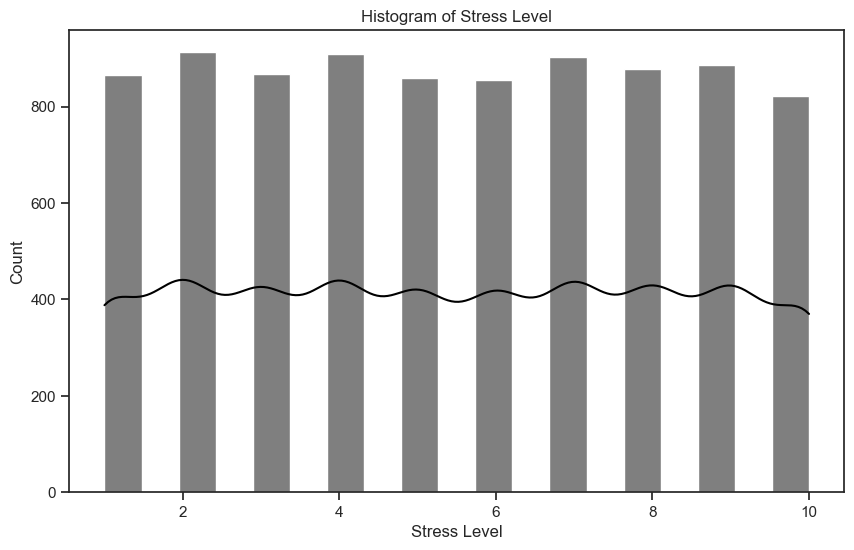

Stress Level: Skewness = 0.01, Kurtosis = -1.23



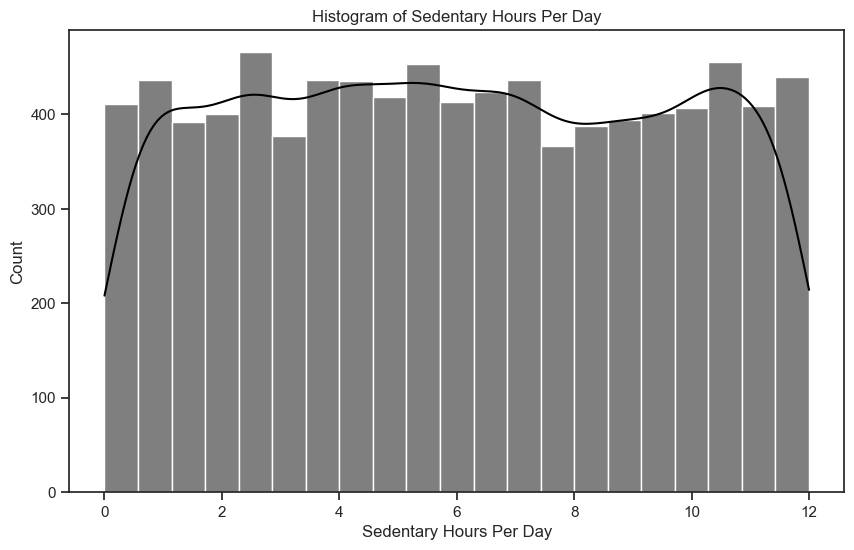

Sedentary Hours Per Day: Skewness = 0.02, Kurtosis = -1.19



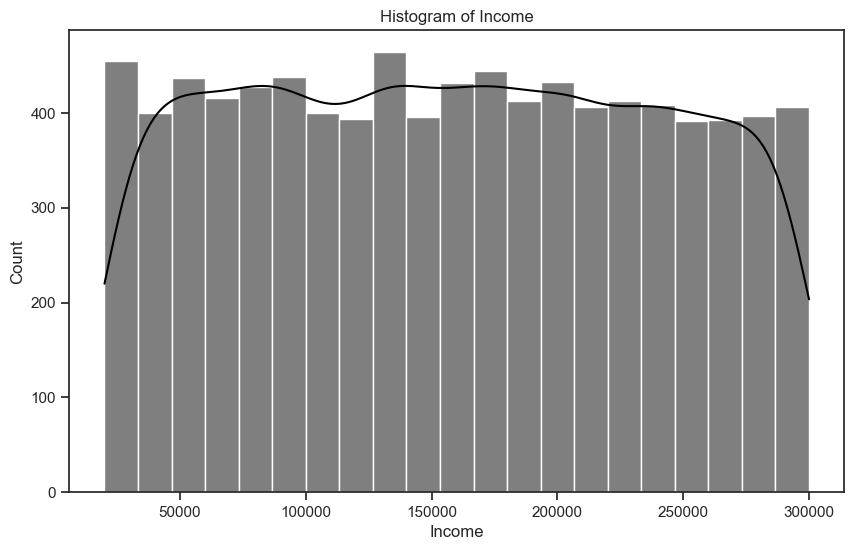

Income: Skewness = 0.02, Kurtosis = -1.18



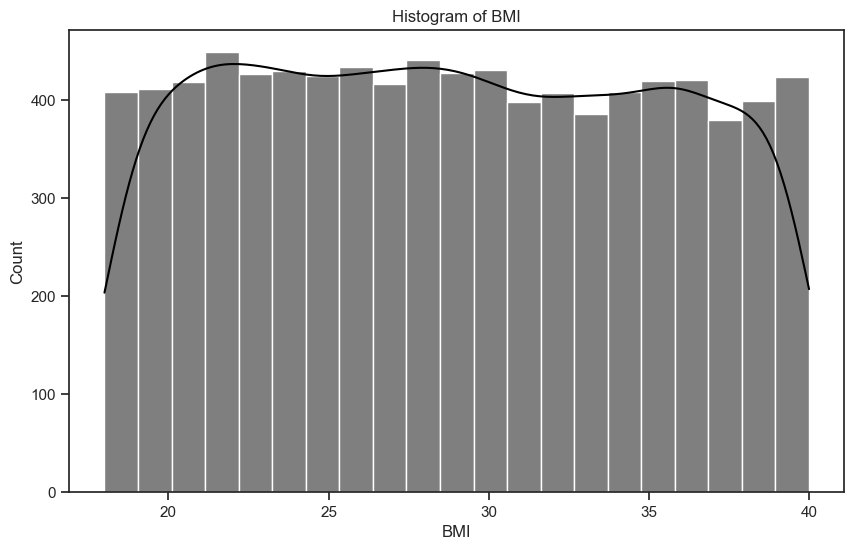

BMI: Skewness = 0.04, Kurtosis = -1.19



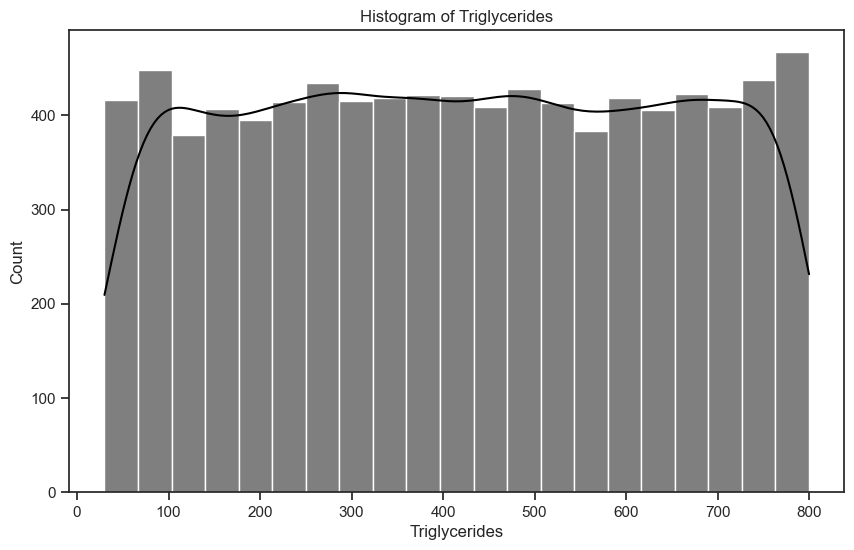

Triglycerides: Skewness = -0.00, Kurtosis = -1.20



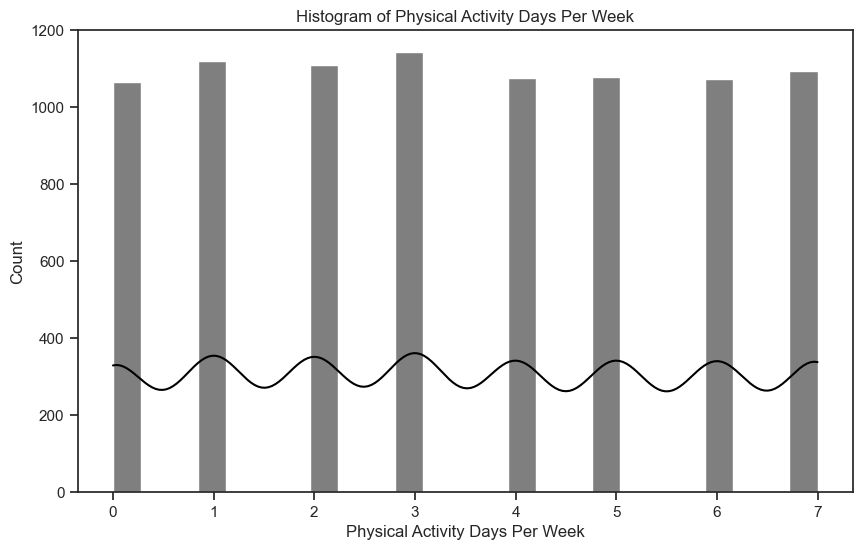

Physical Activity Days Per Week: Skewness = 0.02, Kurtosis = -1.23



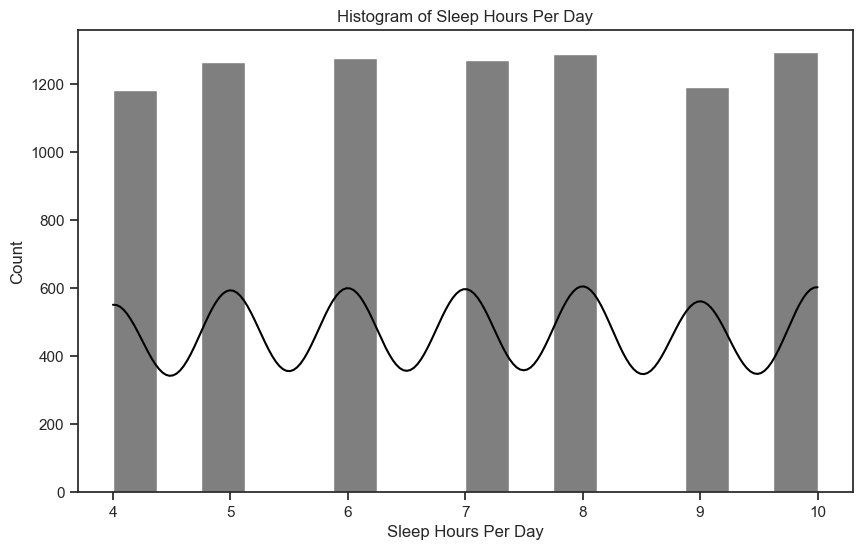

Sleep Hours Per Day: Skewness = 0.00, Kurtosis = -1.23



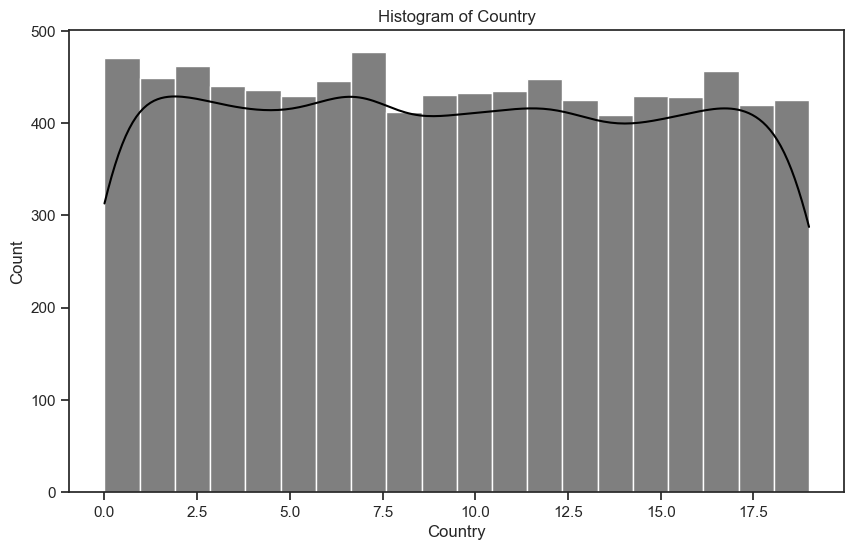

Country: Skewness = 0.02, Kurtosis = -1.21



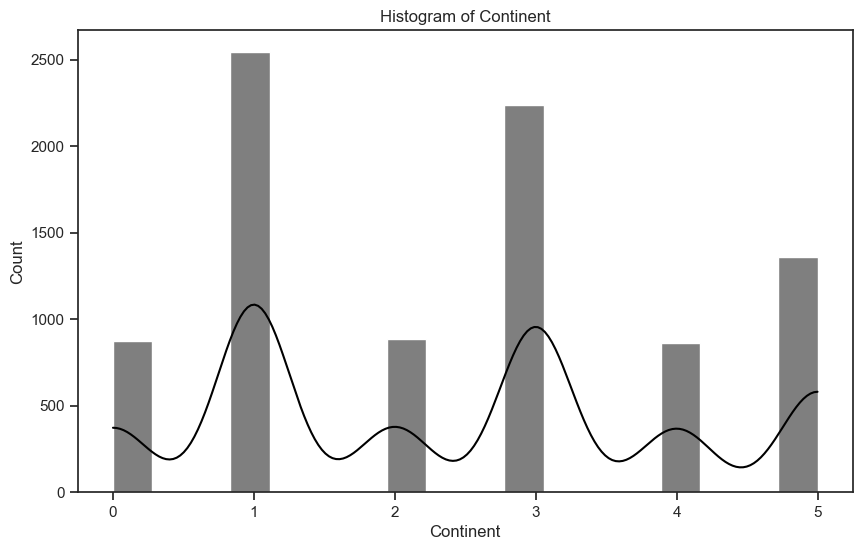

Continent: Skewness = 0.19, Kurtosis = -1.14



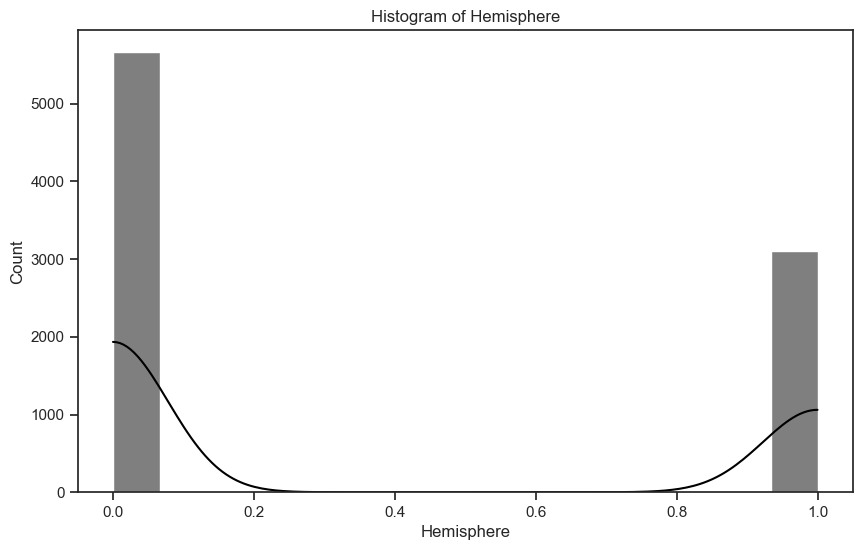

Hemisphere: Skewness = 0.61, Kurtosis = -1.63



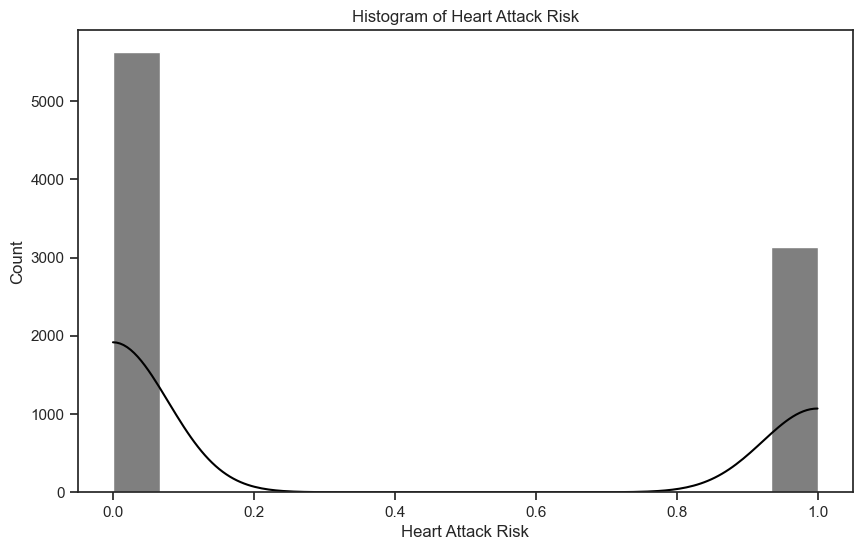

Heart Attack Risk: Skewness = 0.59, Kurtosis = -1.65



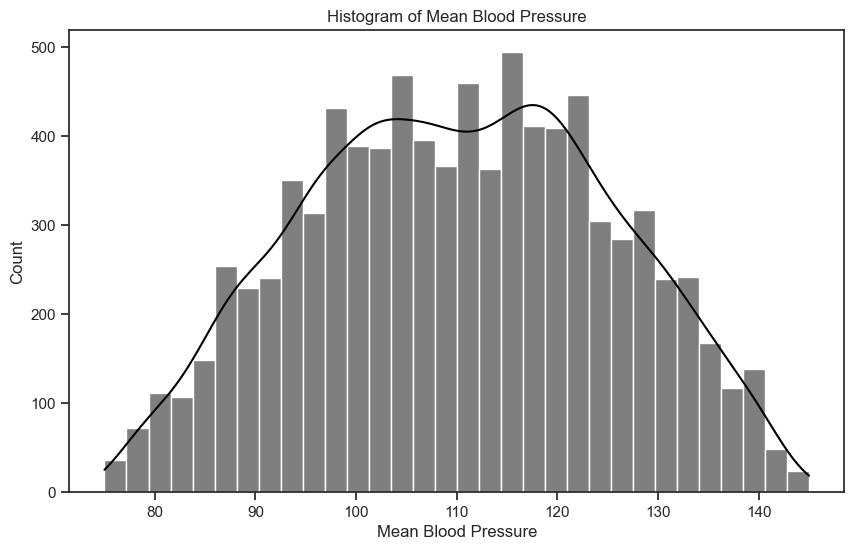

Mean Blood Pressure: Skewness = -0.02, Kurtosis = -0.77



In [323]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness_values = df[numerical_columns].apply(lambda x: skew(x))
kurtosis_values = df[numerical_columns].apply(lambda x: kurtosis(x))

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df[col], kde=True, color='black')
    plt.title(f'Histogram of {col}')
    plt.show()
    
    print(f'{col}: Skewness = {skewness_values[col]:.2f}, Kurtosis = {kurtosis_values[col]:.2f}\n')

# ML Model 

In [324]:
X = df.drop(['Heart Attack Risk', 'Patient ID', 'Country', 'Continent', 'Hemisphere'], axis=1)
y = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.64

Confusion Matrix:
[[1125    0]
 [ 628    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



C:\Users\thush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
